# Tarea Mínimos Cuadrados
Gary Defas

## Ejercicio 2

In [46]:
xs = [
    0.2,
    0.3,
    0.6,
    0.9,
    1.1,
    1.3,
    1.4,
    1.6
]

ys = [
    0.050446,
    0.098426,
    0.33277,
    0.72660,
    1.0972,
    1.5697,
    1.8487,
    2.5015
]

### Ecuacion grado 1

In [47]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

In [48]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

[01-28 22:21:20][INFO] Se ajustarán 2 parámetros.
[01-28 22:21:20][INFO] 
[[ 7.4         8.          8.225342  ]
 [ 0.         -2.02702703  1.03876383]]


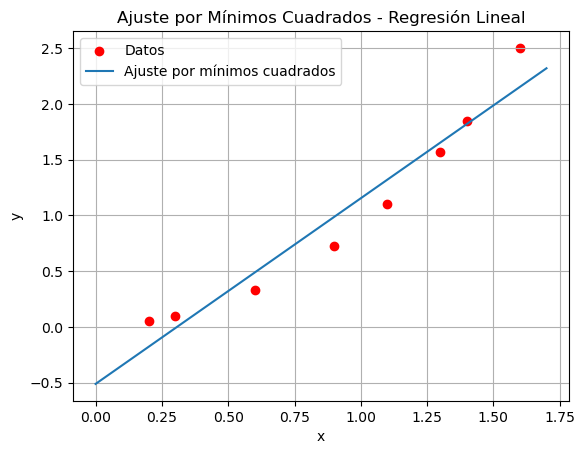

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def f_lineal(x):
    return pars[0] * x + pars[1]

x = np.linspace(0,1.7, 100)
y = f_lineal(x)
plt.scatter(xs, ys, color='red', label='Datos')
plt.plot(x, y, label='Ajuste por mínimos cuadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste por Mínimos Cuadrados - Regresión Lineal')
plt.legend()
plt.grid()
plt.show()

In [50]:
# Calcular el error entre los puntos dados y la ecuación ajustada
errores = []
for xi, yi in zip(xs, ys):
    y_ajustado = f_lineal(xi)
    error = abs(yi - y_ajustado)
    errores.append(error)
    print(f"x = {xi}, y_real = {yi}, y_ajustado = {y_ajustado:.2f}, error = {error:.2f}")

# Error absoluto medio (MAE)
mae = sum(errores) / len(errores)
print(f"\nError Absoluto Medio (MAE): {mae:.4f}")

# Error cuadrático medio (MSE)
mse = sum((yi - f_lineal(xi))**2 for xi, yi in zip(xs, ys)) / len(xs)
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")

# Raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")

x = 0.2, y_real = 0.050446, y_ajustado = -0.18, error = 0.23
x = 0.3, y_real = 0.098426, y_ajustado = -0.01, error = 0.11
x = 0.6, y_real = 0.33277, y_ajustado = 0.49, error = 0.15
x = 0.9, y_real = 0.7266, y_ajustado = 0.99, error = 0.26
x = 1.1, y_real = 1.0972, y_ajustado = 1.32, error = 0.22
x = 1.3, y_real = 1.5697, y_ajustado = 1.65, error = 0.08
x = 1.4, y_real = 1.8487, y_ajustado = 1.82, error = 0.03
x = 1.6, y_real = 2.5015, y_ajustado = 2.15, error = 0.35

Error Absoluto Medio (MAE): 0.1799
Error Cuadrático Medio (MSE): 0.0419
Raíz del Error Cuadrático Medio (RMSE): 0.2048


### Ecuacion grado 2

In [51]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    c_2 = sum(xi**2 for xi in xs)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_2, c_1, c_0, c_ind)


def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    c_2 = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        c_2 += xi*xi*xi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * xi * yi

        c_2 += xi*xi*xi * xi

        # coeficiente del parámetro 1
        c_1 += xi * xi * xi

        # coeficiente del parámetro 0
        c_0 += xi * xi

    return (c_2, c_1, c_0, c_ind)



In [52]:
pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1, der_parcial_2])

[01-28 22:21:20][INFO] Se ajustarán 3 parámetros.
[01-28 22:21:20][INFO] 
[[ 8.72        7.4         8.          8.225342  ]
 [ 0.         -0.91018349 -3.01100917  0.02706512]
 [ 0.         -1.81483486 -5.51009174  0.09599497]]
[01-28 22:21:20][INFO] 
[[ 8.72        7.4         8.          8.225342  ]
 [ 0.         -0.91018349 -3.01100917  0.02706512]
 [ 0.          0.          0.49362564  0.04202923]]


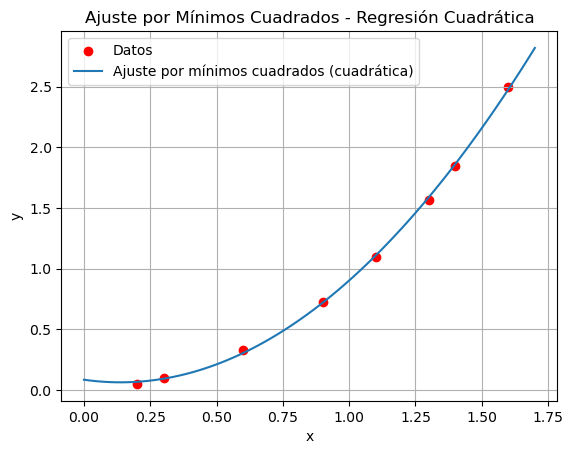

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def f_cuadratica(x):
    return pars[0] * x**2 + pars[1] * x + pars[2]
x = np.linspace(0,1.7, 100)
y = f_cuadratica(x)
plt.scatter(xs, ys, color='red', label='Datos')
plt.plot(x, y, label='Ajuste por mínimos cuadrados (cuadrática)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste por Mínimos Cuadrados - Regresión Cuadrática')
plt.legend()
plt.grid()
plt.show()

In [54]:
# Calcular el error entre los puntos dados y la ecuación ajustada
errores = []
for xi, yi in zip(xs, ys):
    y_ajustado = f_cuadratica(xi)
    error = abs(yi - y_ajustado)
    errores.append(error)
    print(f"x = {xi}, y_real = {yi}, y_ajustado = {y_ajustado:.2f}, error = {error:.2f}")

# Error absoluto medio (MAE)
mae = sum(errores) / len(errores)
print(f"\nError Absoluto Medio (MAE): {mae:.4f}")

# Error cuadrático medio (MSE)
mse = sum((yi - f_cuadratica(xi))**2 for xi, yi in zip(xs, ys)) / len(xs)
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")

# Raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")

x = 0.2, y_real = 0.050446, y_ajustado = 0.07, error = 0.02
x = 0.3, y_real = 0.098426, y_ajustado = 0.09, error = 0.01
x = 0.6, y_real = 0.33277, y_ajustado = 0.30, error = 0.03
x = 0.9, y_real = 0.7266, y_ajustado = 0.72, error = 0.01
x = 1.1, y_real = 1.0972, y_ajustado = 1.11, error = 0.01
x = 1.3, y_real = 1.5697, y_ajustado = 1.59, error = 0.02
x = 1.4, y_real = 1.8487, y_ajustado = 1.86, error = 0.01
x = 1.6, y_real = 2.5015, y_ajustado = 2.48, error = 0.02

Error Absoluto Medio (MAE): 0.0158
Error Cuadrático Medio (MSE): 0.0003
Raíz del Error Cuadrático Medio (RMSE): 0.0174


### Ecuacion grado 3

In [55]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_3(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    c_3 = sum(xi**3 for xi in xs)

    c_2 = sum(xi**2 for xi in xs)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_3, c_2, c_1, c_0, c_ind)


def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_3 = 0
    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0

    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        c_3 += xi*xi*xi*xi

        c_2 += xi*xi*xi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_3, c_2, c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_3 = 0
    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0

    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * xi * yi

        c_3 += xi*xi*xi*xi*xi

        c_2 += xi*xi*xi*xi

        # coeficiente del parámetro 1
        c_1 += xi*xi*xi

        # coeficiente del parámetro 0
        c_0 += xi*xi

    return (c_3, c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_3 = 0
    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0

    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * xi * xi* yi

        c_3 += xi*xi*xi*xi*xi*xi

        c_2 += xi*xi*xi*xi*xi

        # coeficiente del parámetro 1
        c_1 += xi*xi*xi*xi

        # coeficiente del parámetro 0
        c_0 += xi*xi*xi

    return (c_3, c_2, c_1, c_0, c_ind)


In [56]:
pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1, der_parcial_2, der_parcial_3])

[01-28 22:21:21][INFO] Se ajustarán 4 parámetros.
[01-28 22:21:21][INFO] 
[[ 1.13480000e+01  8.72000000e+00  7.40000000e+00  8.00000000e+00
   8.22534200e+00]
 [ 0.00000000e+00 -1.28560437e+00 -2.90582940e+00 -6.68954529e+00
  -1.11668113e+00]
 [ 1.77635684e-15 -5.70767712e-01 -1.39455058e+00 -3.53464928e+00
  -5.11324745e-01]
 [ 0.00000000e+00 -2.33442082e+00 -5.01983877e+00 -1.08472852e+01
  -1.98786471e+00]]
[01-28 22:21:21][INFO] 
[[ 1.13480000e+01  8.72000000e+00  7.40000000e+00  8.00000000e+00
   8.22534200e+00]
 [ 1.77635684e-15 -5.70767712e-01 -1.39455058e+00 -3.53464928e+00
  -5.11324745e-01]
 [ 0.00000000e+00  0.00000000e+00  2.35273864e-01  1.27194317e+00
   3.50331491e-02]
 [ 0.00000000e+00  0.00000000e+00  6.83826393e-01  3.60931199e+00
   1.03436364e-01]]
[01-28 22:21:21][INFO] 
[[ 1.13480000e+01  8.72000000e+00  7.40000000e+00  8.00000000e+00
   8.22534200e+00]
 [ 1.77635684e-15 -5.70767712e-01 -1.39455058e+00 -3.53464928e+00
  -5.11324745e-01]
 [ 0.00000000e+00  0.00000

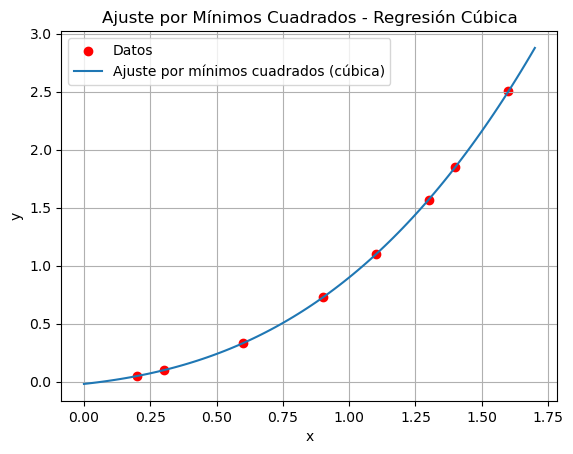

In [57]:
def f_cubica(x):
    return pars[0] * x**3 + pars[1] * x**2 + pars[2] * x + pars[3]

x = np.linspace(0,1.7, 100)
y = f_cubica(x)
plt.scatter(xs, ys, color='red', label='Datos')
plt.plot(x, y, label='Ajuste por mínimos cuadrados (cúbica)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste por Mínimos Cuadrados - Regresión Cúbica')
plt.legend()
plt.grid()
plt.show()

In [58]:
# Calcular el error entre los puntos dados y la ecuación ajustada
errores = []
for xi, yi in zip(xs, ys):
    y_ajustado = f_cubica(xi)
    error = abs(yi - y_ajustado)
    errores.append(error)
    print(f"x = {xi}, y_real = {yi}, y_ajustado = {y_ajustado:.2f}, error = {error:.2f}")

# Error absoluto medio (MAE)
mae = sum(errores) / len(errores)
print(f"\nError Absoluto Medio (MAE): {mae:.4f}")

# Error cuadrático medio (MSE)
mse = sum((yi - f_cubica(xi))**2 for xi, yi in zip(xs, ys)) / len(xs)
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")

# Raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")

x = 0.2, y_real = 0.050446, y_ajustado = 0.05, error = 0.00
x = 0.3, y_real = 0.098426, y_ajustado = 0.10, error = 0.00
x = 0.6, y_real = 0.33277, y_ajustado = 0.33, error = 0.00
x = 0.9, y_real = 0.7266, y_ajustado = 0.73, error = 0.00
x = 1.1, y_real = 1.0972, y_ajustado = 1.10, error = 0.00
x = 1.3, y_real = 1.5697, y_ajustado = 1.57, error = 0.00
x = 1.4, y_real = 1.8487, y_ajustado = 1.85, error = 0.00
x = 1.6, y_real = 2.5015, y_ajustado = 2.50, error = 0.00

Error Absoluto Medio (MAE): 0.0008
Error Cuadrático Medio (MSE): 0.0000
Raíz del Error Cuadrático Medio (RMSE): 0.0008


### Ecuacion $be^{ax}$

In [59]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

In [60]:
import numpy as np

Y = np.log(ys)

pars = ajustar_min_cuadrados(xs, Y, gradiente=[der_parcial_0, der_parcial_1])

a = pars[0]

B = pars[1]
b = np.exp(B)

print(f"y = {b:.4f} * e^({a:.4f} * x)")

[01-28 22:21:21][INFO] Se ajustarán 2 parámetros.
[01-28 22:21:21][INFO] 
[[ 7.4         8.         -4.64996574]
 [ 0.         -2.02702703  6.25437832]]
y = 0.0457 * e^(2.7073 * x)


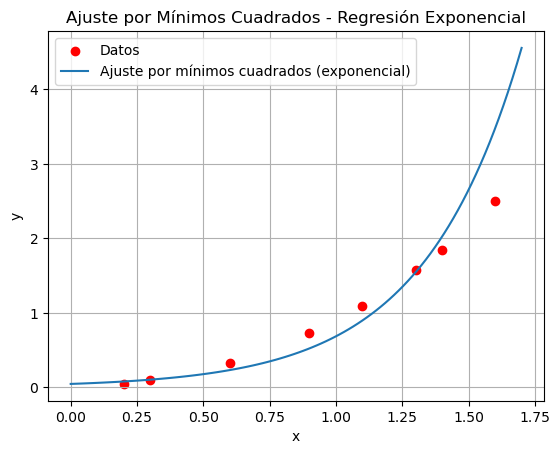

In [61]:
def f_exponencial(x):
    return b * np.exp(a * x)

x = np.linspace(0,1.7, 100)
y = f_exponencial(x)
plt.scatter(xs, ys, color='red', label='Datos')
plt.plot(x, y, label='Ajuste por mínimos cuadrados (exponencial)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste por Mínimos Cuadrados - Regresión Exponencial')
plt.legend()
plt.grid()
plt.show()


In [62]:
# Calcular el error entre los puntos dados y la ecuación ajustada
errores = []
for xi, yi in zip(xs, ys):
    y_ajustado = f_exponencial(xi)
    error = abs(yi - y_ajustado)
    errores.append(error)
    print(f"x = {xi}, y_real = {yi}, y_ajustado = {y_ajustado:.2f}, error = {error:.2f}")

# Error absoluto medio (MAE)
mae = sum(errores) / len(errores)
print(f"\nError Absoluto Medio (MAE): {mae:.4f}")

# Error cuadrático medio (MSE)
mse = sum((yi - f_exponencial(xi))**2 for xi, yi in zip(xs, ys)) / len(xs)
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")

# Raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")

x = 0.2, y_real = 0.050446, y_ajustado = 0.08, error = 0.03
x = 0.3, y_real = 0.098426, y_ajustado = 0.10, error = 0.00
x = 0.6, y_real = 0.33277, y_ajustado = 0.23, error = 0.10
x = 0.9, y_real = 0.7266, y_ajustado = 0.52, error = 0.20
x = 1.1, y_real = 1.0972, y_ajustado = 0.90, error = 0.20
x = 1.3, y_real = 1.5697, y_ajustado = 1.54, error = 0.03
x = 1.4, y_real = 1.8487, y_ajustado = 2.02, error = 0.17
x = 1.6, y_real = 2.5015, y_ajustado = 3.48, error = 0.98

Error Absoluto Medio (MAE): 0.2141
Error Cuadrático Medio (MSE): 0.1344
Raíz del Error Cuadrático Medio (RMSE): 0.3666


### Ecuacion forma $bx^{a}$

In [63]:
import numpy as np

X = np.log(xs)
Y = np.log(ys)

pars = ajustar_min_cuadrados(X, Y, gradiente=[der_parcial_0, der_parcial_1])

B = pars[1]
b = np.exp(B)

print(f"y = {b:.4f} * x^{pars[1]:.4f}")

[01-28 22:21:21][INFO] Se ajustarán 2 parámetros.
[01-28 22:21:21][INFO] 
[[-2.26544655  8.         -4.64996574]
 [ 0.         14.41619386 -0.73707976]]
y = 0.9502 * x^-0.0511


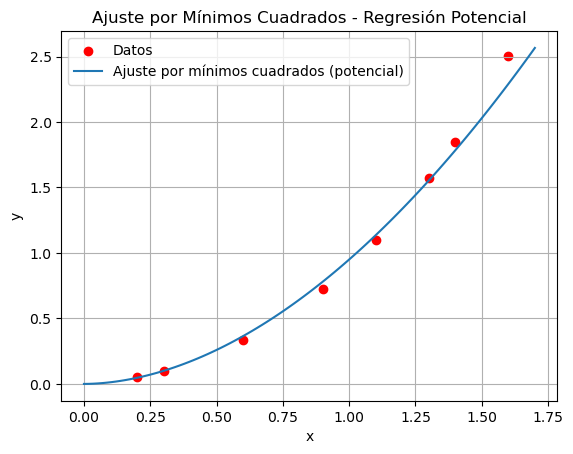

In [64]:
def f_potencial(x):
    return b * x**pars[0]

x = np.linspace(0,1.7, 100)
y = f_potencial(x)
plt.scatter(xs, ys, color='red', label='Datos')
plt.plot(x, y, label='Ajuste por mínimos cuadrados (potencial)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste por Mínimos Cuadrados - Regresión Potencial')
plt.legend()
plt.grid()
plt.show()

In [65]:
# Calcular el error entre los puntos dados y la ecuación ajustada
errores = []
for xi, yi in zip(xs, ys):
    y_ajustado = f_potencial(xi)
    error = abs(yi - y_ajustado)
    errores.append(error)
    print(f"x = {xi}, y_real = {yi}, y_ajustado = {y_ajustado:.2f}, error = {error:.2f}")

# Error absoluto medio (MAE)
mae = sum(errores) / len(errores)
print(f"\nError Absoluto Medio (MAE): {mae:.4f}")

# Error cuadrático medio (MSE)
mse = sum((yi - f_potencial(xi))**2 for xi, yi in zip(xs, ys)) / len(xs)
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")

# Raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")

x = 0.2, y_real = 0.050446, y_ajustado = 0.05, error = 0.00
x = 0.3, y_real = 0.098426, y_ajustado = 0.10, error = 0.00
x = 0.6, y_real = 0.33277, y_ajustado = 0.37, error = 0.03
x = 0.9, y_real = 0.7266, y_ajustado = 0.78, error = 0.05
x = 1.1, y_real = 1.0972, y_ajustado = 1.14, error = 0.04
x = 1.3, y_real = 1.5697, y_ajustado = 1.55, error = 0.02
x = 1.4, y_real = 1.8487, y_ajustado = 1.78, error = 0.06
x = 1.6, y_real = 2.5015, y_ajustado = 2.29, error = 0.21

Error Absoluto Medio (MAE): 0.0528
Error Cuadrático Medio (MSE): 0.0068
Raíz del Error Cuadrático Medio (RMSE): 0.0825
